# CROP RECOMMENDATION SYSTEM 

The data used in this project is made by augmenting and combining various publicly available datasets of India like weather, soil, etc. You can access the dataset [here](https://www.kaggle.com/atharvaingle/crop-recommendation-dataset). This data is relatively simple with very few but useful features unlike the complicated features affecting the yield of the crop.

The data have Nitrogen, Phosphorous, Pottasium and pH values of the soil. Also, it also contains the humidity, temperature and rainfall required for a particular crop. 

In [1]:
# Importing libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.size

17600

In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

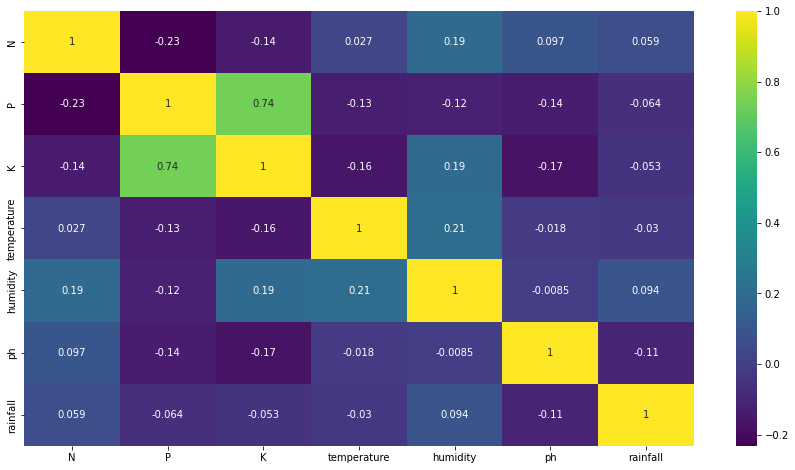

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.iloc[:,:-1].corr(),annot=True, cmap='viridis')
plt.show()

In [11]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [30]:
df.columns[:-1].values

array(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],
      dtype=object)

In [38]:
dt=[]
for i in df.columns:
    if(i=="label"):continue
    val=df[i].values
    dt.append(val)
len(dt)

7

In [35]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

ValueError: Dimensions of labels and X must be compatible

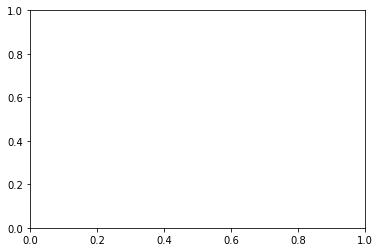

In [36]:
labels= ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall' ]
df1,df2,df3,df4,df5,df6,df7=dt
sns.boxplot([df1,df2,df3,df4,df5,df6,df7], labels=labels)


### Seperating features and target label

In [13]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [14]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [15]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features,target,test_size = 0.3,random_state =0)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,Y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Y_test,predicted_values))

DecisionTrees's Accuracy is:  91.21212121212122
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.65      1.00      0.78        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      0.90      0.95        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.23      0.37        31
 kidneybeans       1.00      0.81      0.89        26
      lentil       0.88      1.00      0.94        22
       maize       0.71      0.81      0.76        27
       mango       1.00      0.93      0.96        28
   mothbeans       1.00      0.50      0.67        36
    mungbean       0.94      1.00      0.97        29
   muskmelon       0.97      1.00      0.98        30
      orange       1.00      1.00

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [19]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [20]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,Y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9939393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.91      0.97      0.94        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [22]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [23]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(X_train,Y_train)

predicted_values = SVM.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

SVM's Accuracy is:  0.0893939393939394
              precision    recall  f1-score   support

       apple       1.00      0.29      0.44        28
      banana       1.00      0.07      0.12        30
   blackgram       1.00      0.03      0.06        31
    chickpea       1.00      0.03      0.06        34
     coconut       1.00      0.12      0.21        26
      coffee       1.00      0.03      0.07        29
      cotton       1.00      0.18      0.30        28
      grapes       0.00      0.00      0.00        30
        jute       1.00      0.06      0.12        31
 kidneybeans       0.00      0.00      0.00        26
      lentil       0.04      1.00      0.07        22
       maize       0.00      0.00      0.00        27
       mango       1.00      0.04      0.07        28
   mothbeans       0.00      0.00      0.00        36
    mungbean       1.00      0.14      0.24        29
   muskmelon       1.00      0.17      0.29        30
      orange       0.00      0.00      0.0

In [26]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,Y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

Logistic Regression's Accuracy is:  0.95
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.84      0.87      0.86        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.84      0.96      0.90        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.96      1.00      0.98        26
      lentil       0.91      0.91      0.91        22
       maize       0.92      0.81      0.86        27
       mango       1.00      1.00      1.00        28
   mothbeans       0.81      0.81      0.81        36
    mungbean       1.00      0.97      0.98        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1

In [28]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

### Saving trained Logistic Regression model

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

RF's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.97      0.98        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00

In [31]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

### Saving trained Random Forest model

In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

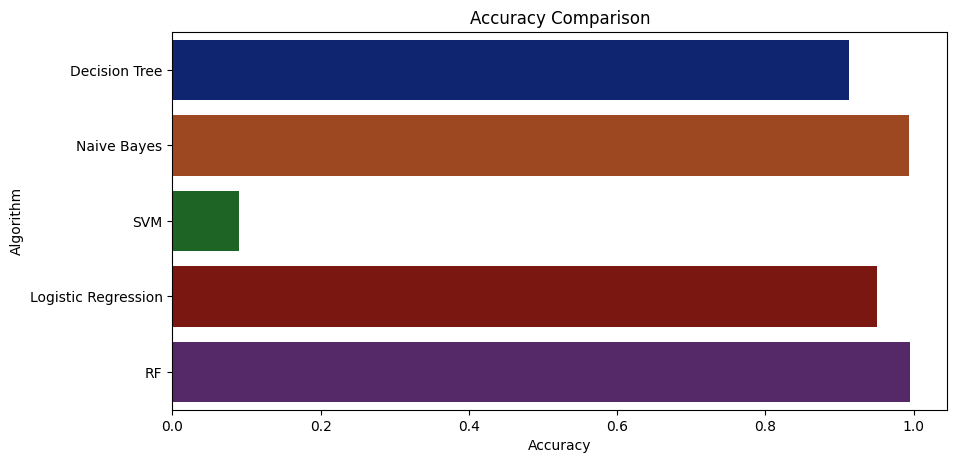

In [34]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')
plt.show()

In [35]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9121212121212121
Naive Bayes --> 0.9939393939393939
SVM --> 0.0893939393939394
Logistic Regression --> 0.95
RF --> 0.9954545454545455


## Making a prediction

In [36]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [37]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
